In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv("data_640_validated.csv")
df=df.rename(columns={"A1_1":"Nationality", "A1_2":"Region","A2":"Gender","A3":"Highest Edu","A4":"P or G","A5":"Age",
                   "A6":"Ethenicity","A7":"Marital Stat","A8":"Employment Stat"})
df['Age'].mask(df['Age'] == 'sub 28', '28', inplace=True)
df['Age'].mask(df['Age'] == '30s', '35', inplace=True)
list1=['Canadian', 'Canadian ', 'Candadian','Portuguese-Canadian','canadian']
for i in range(0,len(df['Nationality'])):
    if df["Region"][i]=="Asia":
        df["Nationality"][i]="Asian"
    elif df["Region"][i]=="EU":
        df["Nationality"][i]="European/British"
    elif df["Region"][i]=="US/Canada" and ( df["Region"][i] not in list1):
        df["Nationality"][i]="American"
    elif df["Region"][i]=="US/Canada" and ( df["Region"][i] in list1):
        df["Nationality"][i]="Canadian"
    else:
        df["Nationality"][i]=df["Nationality"][i]
df['Date'] = pd.to_datetime(df['Date'])
df['Age']= pd.to_numeric(df['Age'])
df["Index"]=pd.to_numeric(df['Index'])
data=df.sort_values(by="Index")
data.head(2)

/var/folders/43/ys05gj490c52sd_1b4cdfwz40000gn/T/ipykernel_1300/624898086.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nationality"][i]="Asian"
/var/folders/43/ys05gj490c52sd_1b4cdfwz40000gn/T/ipykernel_1300/624898086.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nationality"][i]="American"
/var/folders/43/ys05gj490c52sd_1b4cdfwz40000gn/T/ipykernel_1300/624898086.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Index,Date,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
128,1,2020-05-15 14:20:00,American,US/Canada,Male,Undergraduate school,None,22,Asian,"Single, never married",...,2,2,2,2,2,2,2,2,2,2
164,2,2020-05-15 18:37:00,Asian,Asia,Female,Undergraduate school,A garden,23,Asian,"Single, never married",...,3,2,3,3,4,3,2,3,2,2


In [14]:
df_new=df.copy()
df_new['Nationality']=df['Nationality'].astype('category').cat.codes
df_new['Region']=df['Region'].astype('category').cat.codes
df_new['Gender']=df['Gender'].astype('category').cat.codes
df_new['Highest Edu']=df['Highest Edu'].astype('category').cat.codes
df_new['P or G']=df['P or G'].astype('category').cat.codes
df_new['Age']=df['Age'].astype('category').cat.codes
df_new['Ethenicity']=df['Ethenicity'].astype('category').cat.codes
df_new['Marital Stat']=df['Marital Stat'].astype('category').cat.codes
df_new['Employment Stat']=df['Employment Stat'].astype('category').cat.codes
df_new['C1']=df['C1'].astype('category').cat.codes
df_new['C3']=df['C3'].astype('category').cat.codes
df_new['C5']=df['C5'].astype('category').cat.codes
df_new['C7']=df['C7'].astype('category').cat.codes
df_new['C9']=df['C9'].astype('category').cat.codes
df_new['C11']=df['C11'].astype('category').cat.codes
df_new['C13']=df['C13'].astype('category').cat.codes
df_new['C15']=df['C15'].astype('category').cat.codes
df_new['C2']=df['C2'].astype('category').cat.codes
df_new['C4']=df['C4'].astype('category').cat.codes
df_new['C6']=df['C6'].astype('category').cat.codes
df_new['C8']=df['C8'].astype('category').cat.codes
df_new['C10']=df['C10'].astype('category').cat.codes
df_new['C12']=df['C12'].astype('category').cat.codes
df_new['C14']=df['C14'].astype('category').cat.codes

In [15]:
for j in range(2,15,2):
    b="C"+str(j)
    for i in range(0,len(df_new[b])):
        if df_new[b][i]==1:
            df_new[b][i]=5
        elif df_new[b][i]==2:
            df_new[b][i]=4
        elif df_new[b][i]==3:
            df_new[b][i]=3
        elif df_new[b][i]==4:
            df_new[b][i]=2
        elif df_new[b][i]==5:
            df_new[b][i]=1
            
df['C2']

/var/folders/43/ys05gj490c52sd_1b4cdfwz40000gn/T/ipykernel_1300/2720282316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[b][i]=4
/var/folders/43/ys05gj490c52sd_1b4cdfwz40000gn/T/ipykernel_1300/2720282316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[b][i]=5
/var/folders/43/ys05gj490c52sd_1b4cdfwz40000gn/T/ipykernel_1300/2720282316.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[b][i]=3
/var/folders/

0      3
1      2
2      2
3      4
4      4
      ..
635    2
636    3
637    3
638    4
639    4
Name: C2, Length: 640, dtype: int64

In [16]:
df_new['C2']

0      4
1      5
2      5
3      3
4      3
      ..
635    5
636    4
637    4
638    3
639    3
Name: C2, Length: 640, dtype: int8

C 1
[0.02869097 0.0319944  0.03151566 0.10369322 0.1214404  0.41222096
 0.0741301  0.05687319 0.1394411 ]


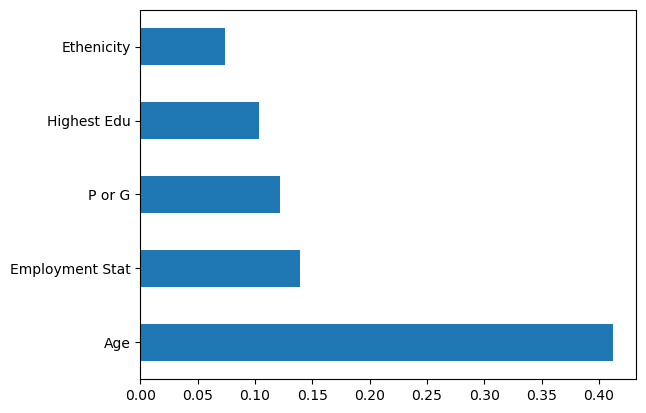

C 2
[0.0270571  0.02799633 0.04555061 0.09069751 0.15074972 0.39092266
 0.07219797 0.05988016 0.13494795]


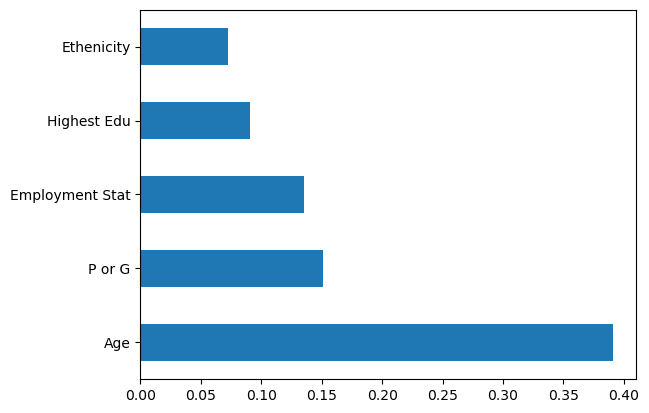

C 3
[0.0312286  0.03100138 0.03257692 0.08750417 0.12366491 0.41414085
 0.07794975 0.06702361 0.1349098 ]


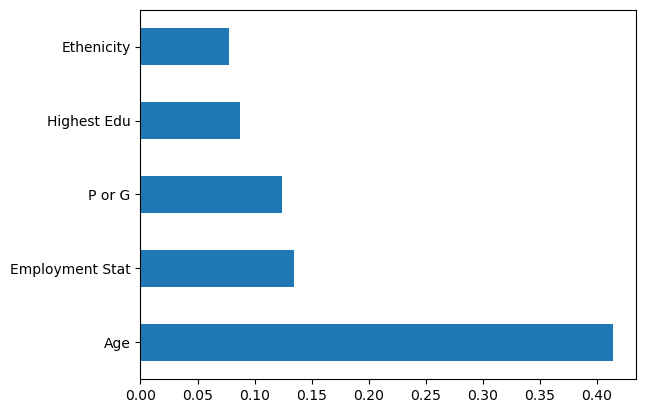

C 4
[0.0232174  0.02607406 0.03043635 0.09359378 0.12936883 0.42103715
 0.0600724  0.06633689 0.14986313]


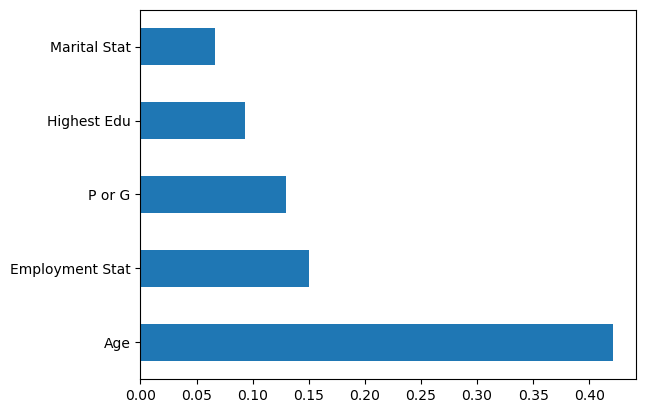

C 5
[0.02455731 0.03058317 0.04003239 0.08370841 0.14871841 0.39313939
 0.07102819 0.06291134 0.14532137]


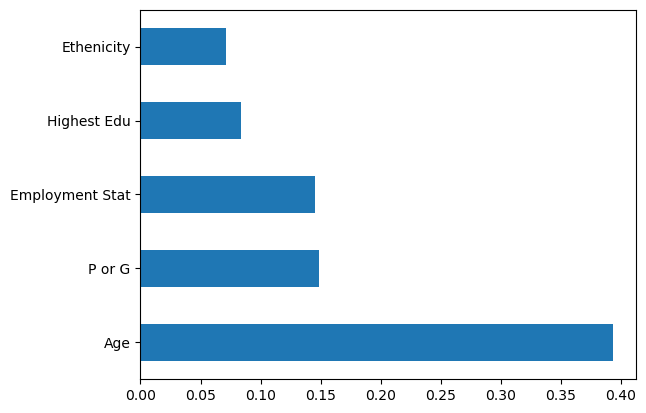

C 6
[0.02513788 0.02999999 0.04406723 0.08267793 0.14746011 0.39514848
 0.06478155 0.07128455 0.13944228]


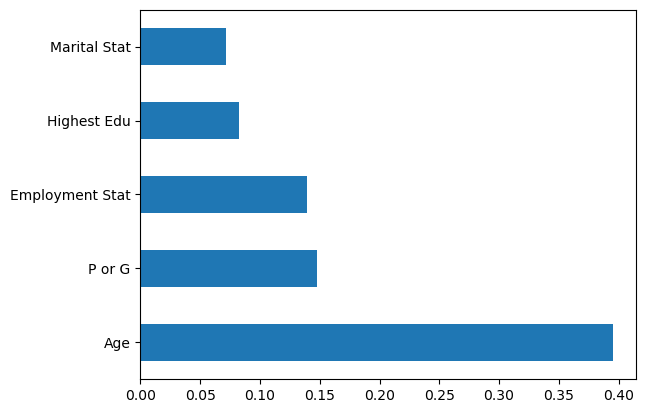

C 7
[0.03106385 0.03052419 0.05208129 0.1065247  0.13502399 0.39178514
 0.07520639 0.04777295 0.1300175 ]


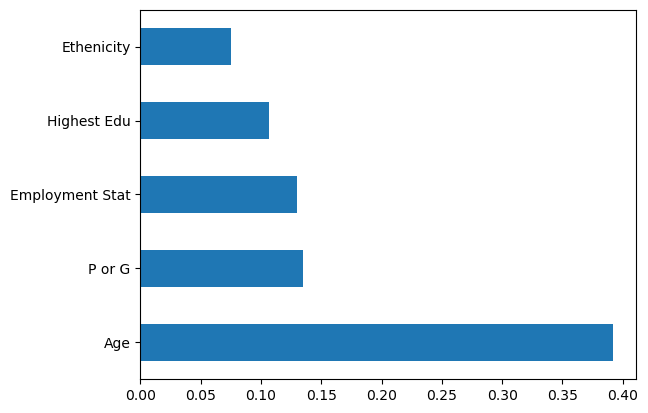

C 8
[0.02843516 0.02932965 0.04284508 0.08750081 0.13097329 0.39487706
 0.07921261 0.05726389 0.14956244]


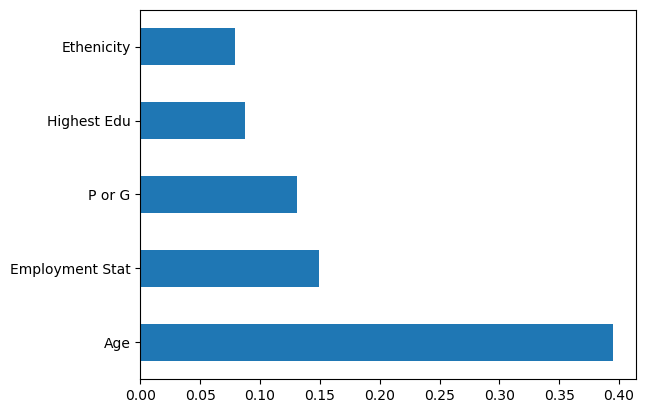

C 9
[0.02145394 0.02587347 0.04395245 0.09549265 0.15133822 0.400024
 0.06863552 0.05919771 0.13403205]


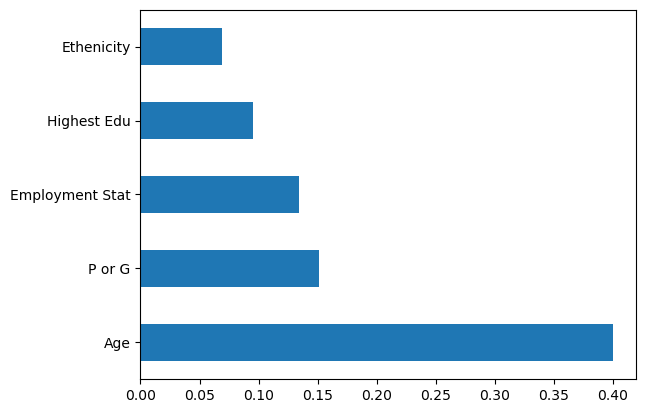

C 10
[0.02426855 0.02876417 0.0599762  0.09167977 0.13937339 0.39989748
 0.06390228 0.05842665 0.13371152]


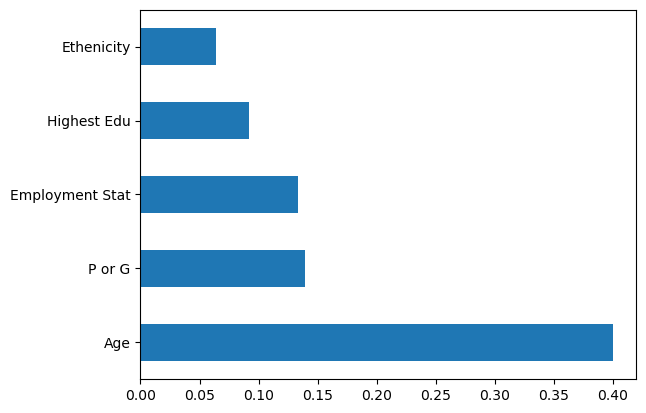

C 11
[0.02286836 0.02529025 0.02814346 0.07892388 0.13444809 0.41772174
 0.07217278 0.06810192 0.15232952]


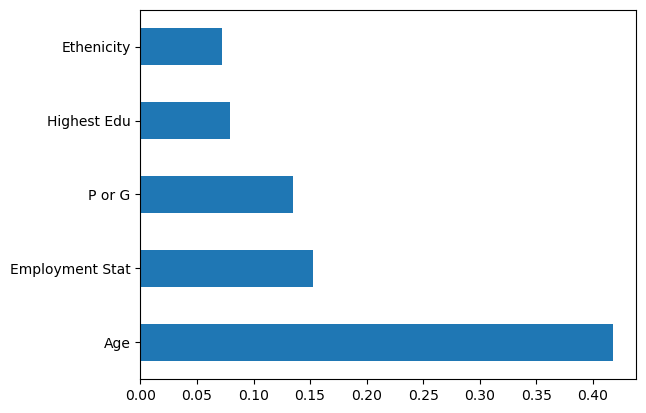

C 12
[0.02821941 0.02542901 0.05987469 0.09828187 0.14429374 0.38051148
 0.07213883 0.05163902 0.13961195]


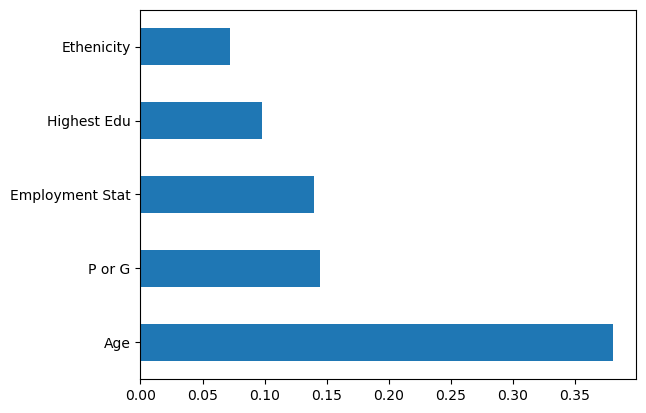

C 13
[0.02491789 0.02328954 0.0438944  0.08356708 0.14461042 0.41021401
 0.07205185 0.06698158 0.13047323]


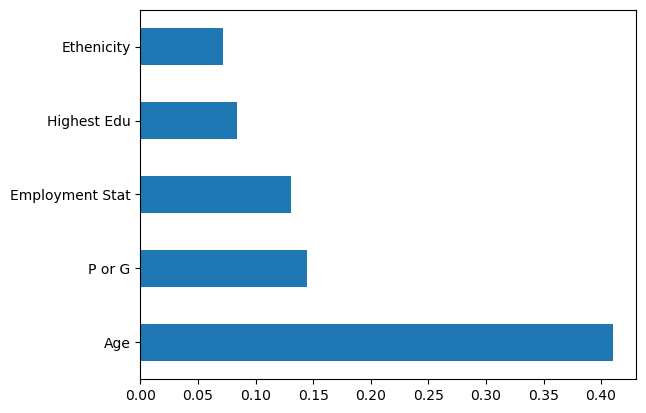

C 14
[0.02351541 0.0270786  0.04492623 0.10992227 0.14115742 0.38903114
 0.07017141 0.05749622 0.1367013 ]


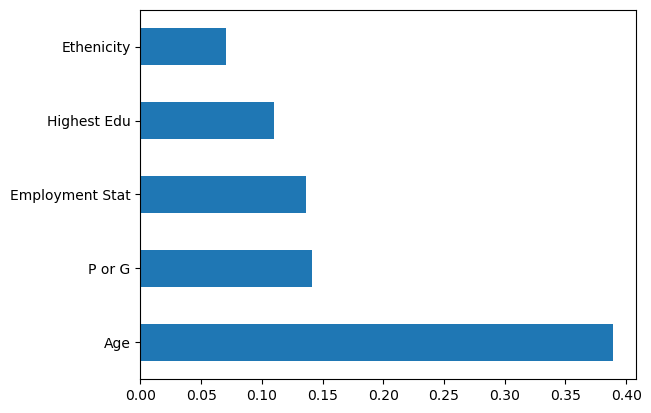

C 15
[0.03346404 0.03445899 0.02967207 0.09879364 0.13650603 0.41526509
 0.07597259 0.05311985 0.12274771]


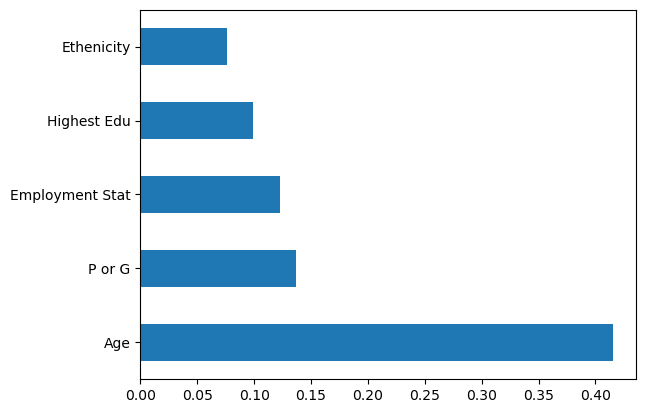

In [5]:
for i in range(14,29):
    X = df_new.iloc[:,2:11]  #independent columns
    y = df_new.iloc[:,i]   
    #target column i.e price range
    print ("C",+ (i-13))
    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(5).plot(kind='barh')
    plt.show()

In [6]:
df_new1 = df_new.iloc[: , [2,3,4,5,6,7,8,9,10,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]].copy() 
df_new1

,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,Employment Stat,C1,...,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,4,0,1,3,1,0,0,3,1,3,...,5,3,4,2,3,4,2,2,3,3
1,1,3,1,3,2,1,6,3,1,3,...,4,4,2,4,2,4,2,4,4,4
2,1,3,1,3,2,1,6,3,1,4,...,4,4,2,4,2,4,2,4,4,4
3,4,0,0,1,1,1,0,3,1,3,...,0,4,3,3,4,4,2,4,5,4
4,1,3,1,3,1,2,2,3,1,2,...,0,2,3,4,4,2,3,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,8,1,0,0,2,34,6,1,2,2,...,5,3,5,3,3,2,3,3,4,3
636,1,3,0,4,1,35,6,4,5,3,...,4,3,3,3,2,3,2,3,4,3
637,1,3,0,4,1,36,6,1,7,3,...,5,3,4,4,2,3,3,3,3,4
638,1,3,0,4,2,23,4,1,7,3,...,3,1,4,3,3,3,3,3,4,3


<Axes: >

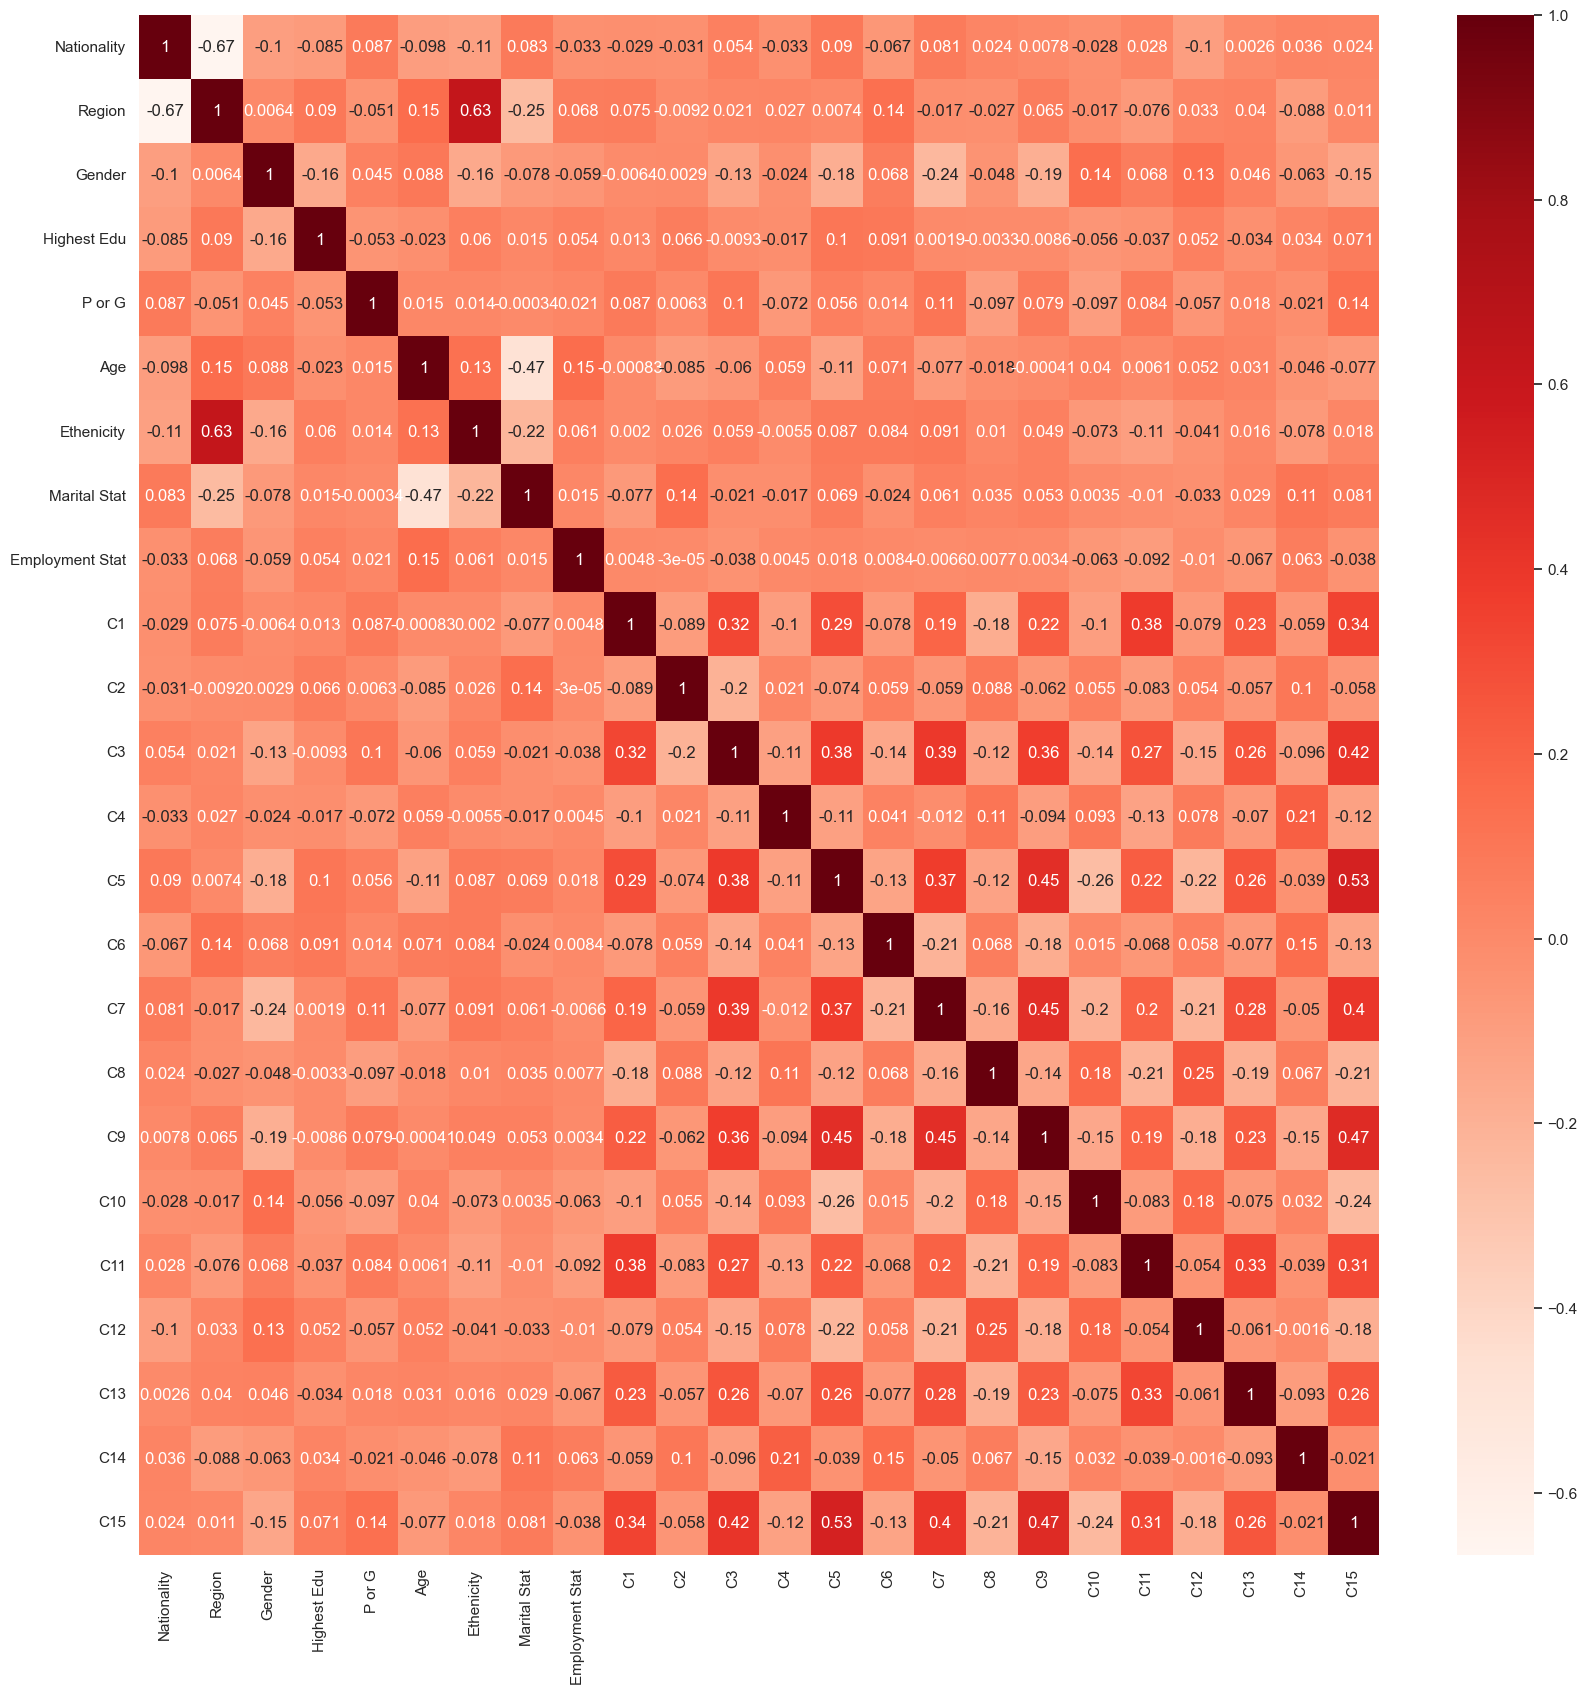

In [7]:
sns.set(rc={'figure.figsize':(20,20)})

correlations=df_new1.corr()
sns.heatmap(correlations, annot=True, cmap=plt.cm.Reds)

In [8]:
a=df_new.iloc[: , [2,3,4,5,6,7,8,9,10]].copy() 
a

,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,Employment Stat
0,4,0,1,3,1,0,0,3,1
1,1,3,1,3,2,1,6,3,1
2,1,3,1,3,2,1,6,3,1
3,4,0,0,1,1,1,0,3,1
4,1,3,1,3,1,2,2,3,1
...,...,...,...,...,...,...,...,...,...
635,8,1,0,0,2,34,6,1,2
636,1,3,0,4,1,35,6,4,5
637,1,3,0,4,1,36,6,1,7
638,1,3,0,4,2,23,4,1,7


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification

# Create a sample dataset (replace this with your dataset)
X, y = a,df_new1['C1']

# Initialize the model (you can use your own model)
model = RandomForestClassifier()
model.fit(X, y)

# Select top features based on importance
sfm = SelectFromModel(model, threshold='median')
sfm.fit(X, y)

selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Highest Edu', 'P or G', 'Age', 'Ethenicity', 'Employment Stat'], dtype='object')


In [12]:
import xgboost as xgb
from sklearn.datasets import make_classification
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Create a sample dataset (replace this with your dataset)
X, y = a,df_new1['C1']

# Initialize XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X, y)

# Plot feature importance
sfm = SelectFromModel(model, threshold='median')
sfm.fit(X, y)

selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Nationality', 'Region', 'P or G', 'Ethenicity', 'Employment Stat'], dtype='object')


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Create a sample dataset (replace this with your dataset)
X, y = a,df_new1['C1']

# Initialize Logistic Regression classifier
model = LogisticRegression()
model.fit(X, y)

# Feature coefficients for Logistic Regression
sfm = SelectFromModel(model, threshold='median')
sfm.fit(X, y)

selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Nationality', 'Region', 'Gender', 'P or G', 'Marital Stat'], dtype='object')


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Feature Importance Scores: [0.04136393 0.04840736 0.01197339 0.12604417 0.15141402 0.32449438
 0.10654328 0.0574201  0.13233937]


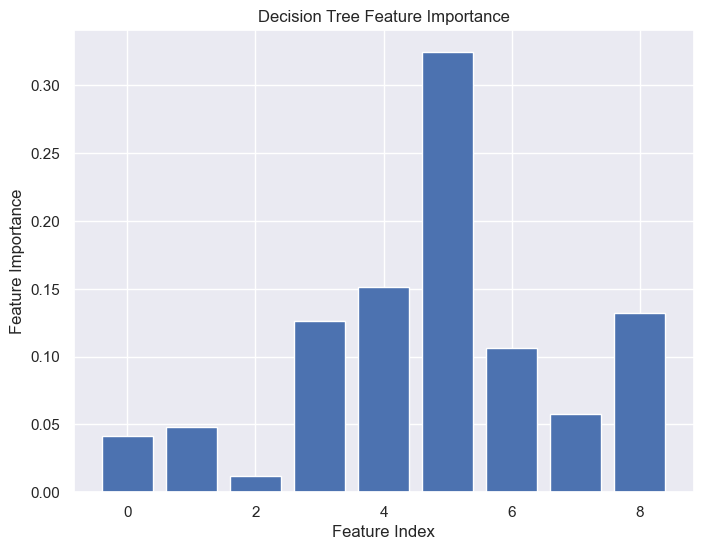

Selected Features: Index(['Highest Edu', 'P or G', 'Age', 'Ethenicity', 'Employment Stat'], dtype='object')


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create a sample dataset (replace this with your dataset)
X, y = a,df_new1['C1']

# Initialize Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X, y)

# Feature importance using DecisionTreeClassifier
feature_importance = model.feature_importances_
print("Feature Importance Scores:", feature_importance)

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()
sfm = SelectFromModel(model, threshold='median')
sfm.fit(X, y)

selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Feature Coefficients: [0.03182597 0.14911848 0.0495196  0.00589762 0.10412378 0.00824362
 0.04773849 0.08328336 0.00326434]


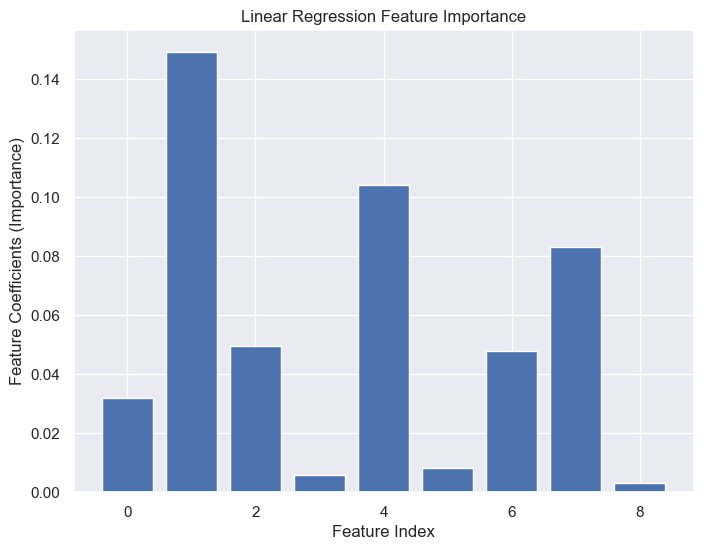

Selected Features: Index(['Region', 'Gender', 'P or G', 'Ethenicity', 'Marital Stat'], dtype='object')


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Create a sample dataset (replace this with your dataset)
X, y = a,df_new1['C1']

# Initialize Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients of features in Linear Regression
feature_importance = np.abs(model.coef_)
print("Feature Coefficients:", feature_importance)

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Feature Coefficients (Importance)')
plt.title('Linear Regression Feature Importance')
plt.show()

sfm = SelectFromModel(model, threshold='median')
sfm.fit(X, y)

selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X contains features and y contains results/target
model = RandomForestRegressor()
model.fit(a, df_new1['C1'])

# Feature importance scores
feature_importance = model.feature_importances_
feature_importance
sfm = SelectFromModel(model, threshold='median')
sfm.fit(X, y)

selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Highest Edu', 'P or G', 'Age', 'Ethenicity', 'Employment Stat'], dtype='object')
